In [1]:
!python -m pip install findspark

In [2]:
import findspark
findspark.init()

In [29]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'spark' as hello ")
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [32]:
df = (spark.read  .format("csv")  .option("header", "true")  .option("inferSchema", "true")  .load("D:\BigDataProject-BtechDS4thYear\BigDataProject-Capstone\dataCollection\state_year_expanded_column_data.csv"))


In [42]:
df.show()

+---+----+------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+---------------+-----

In [41]:
print((df.count(), len(df.columns)))

(533, 490)


In [4]:
!pip install seaborn

In [5]:
!pip install statsmodels

In [6]:
!pip install pandas

In [7]:
import pickle
import pandas as pd 
from pyspark import SparkContext
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
with open("D:\BigDataProject-BtechDS4thYear\BigDataProject-Capstone\dataCollection\9_feature_1980_2020_statewise.pkl", 'rb') as file:
    data = pickle.load(file)

In [11]:
data

,Date,min_humidity,max_humidity,min_temp,max_temp,vapor_pressure_deficit,near_surface_specific_humidity,precipitation,solar_radiation,wind_speed,state,ID
0,2000-01-01,55.1,100.0,267.0,280.6,0.16,0.00345,0.0,96.8,4.3,Illinois,0
1,2000-01-02,63.7,100.0,271.6,286.6,0.23,0.00511,0.0,94.1,5.9,Illinois,0
2,2000-01-03,59.0,100.0,268.9,277.7,0.05,0.00376,5.0,47.4,4.0,Illinois,0
3,2000-01-04,59.3,100.0,264.5,274.1,0.14,0.00219,0.0,78.3,7.3,Illinois,0
4,2000-01-05,43.4,88.9,263.8,273.7,0.2,0.0017,0.0,87.2,5.3,Illinois,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194683,1999-12-27,31.4,86.0,266.5,275.8,0.24,0.00195,0.0,41.1,3.3,Kentucky,12
194684,1999-12-28,38.5,90.6,267.5,275.5,0.17,0.00245,0.0,67.8,5.4,Kentucky,12
194685,1999-12-29,54.4,96.5,268.5,280.3,0.13,0.00372,0.0,98.9,3.5,Kentucky,12
194686,1999-12-30,48.7,92.3,271.7,282.5,0.31,0.00346,0.0,83.9,3.1,Kentucky,12


In [12]:
data.sort_values(by='Date',inplace=True)

In [13]:
data.reset_index(inplace=True)

In [14]:
data.drop(columns=['index'],inplace=True)

In [15]:
data

,Date,min_humidity,max_humidity,min_temp,max_temp,vapor_pressure_deficit,near_surface_specific_humidity,precipitation,solar_radiation,wind_speed,state,ID
0,1980-01-01,41.3,83.9,266.3,279.8,0.34,0.00223,0.0,87.5,3.0,Nebraska,6
1,1980-01-01,31.1,81.0,263.8,278.9,0.35,0.0017,0.0,69.3,2.1,South Dakota,8
2,1980-01-01,47.6,87.0,267.7,274.8,0.18,0.00233,0.0,88.0,2.6,Wisconsin,9
3,1980-01-01,54.2,97.1,271.3,279.6,0.23,0.00325,0.0,93.5,2.8,Kentucky,12
4,1980-01-01,46.6,87.0,269.5,281.3,0.33,0.00282,0.0,102.5,2.5,Missouri,5
...,...,...,...,...,...,...,...,...,...,...,...,...
194683,2020-12-31,43.9,100.0,258.8,276.1,0.16,0.00216,0.0,92.2,3.8,Nebraska,6
194684,2020-12-31,59.1,96.0,266.4,274.2,0.13,0.00245,20.5,107.3,4.3,Missouri,5
194685,2020-12-31,39.2,85.2,266.0,277.6,0.27,0.00213,0.0,106.3,3.6,Kansas,3
194686,2020-12-31,70.0,100.0,261.5,269.1,0.06,0.00185,0.0,95.0,2.8,Iowa,2


In [ ]:
data.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 194688 entries, 0 to 194687
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
194688 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 MB


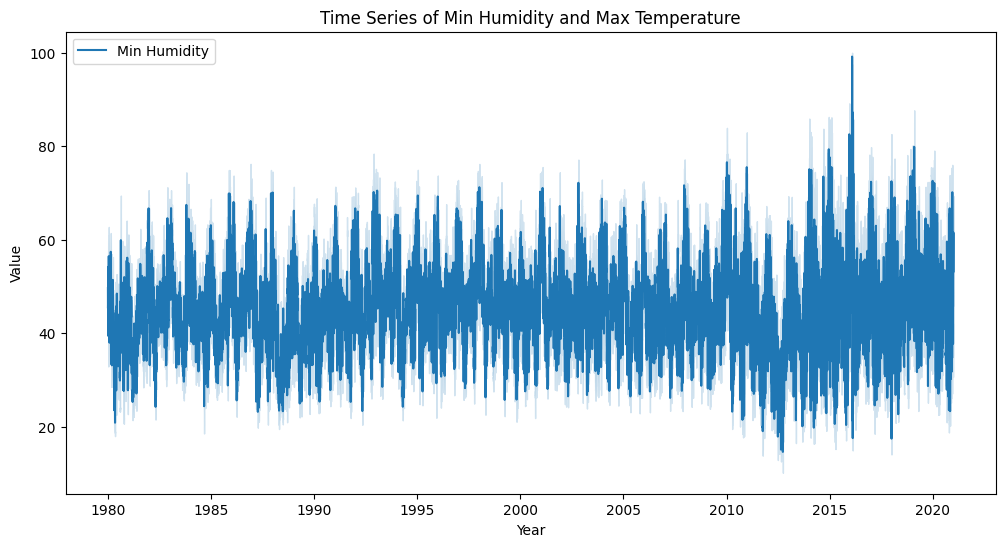

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.Date, y='min_humidity', label='Min Humidity')
plt.title('Time Series of Min Humidity')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


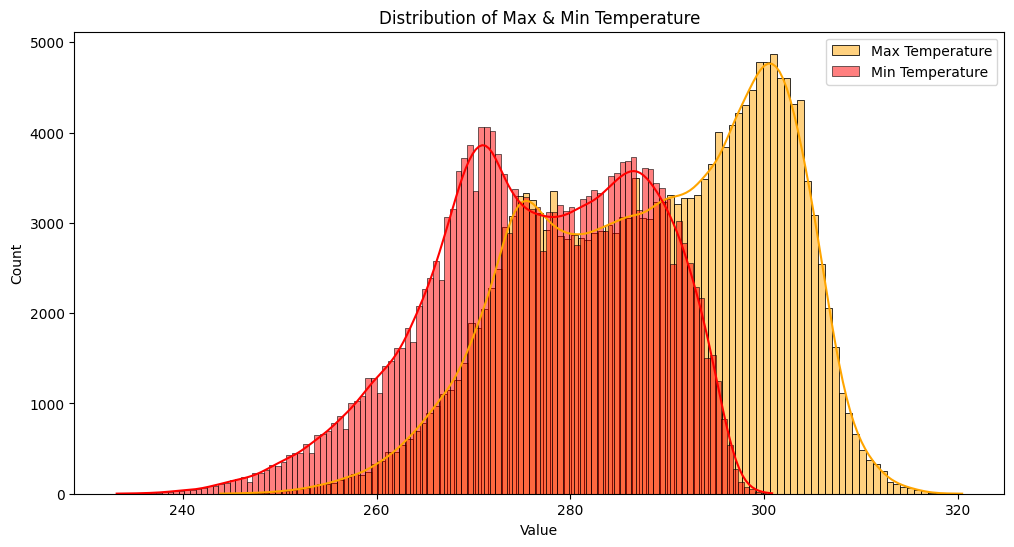

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['max_temp'], kde=True, label='Max Temperature', color='orange')
sns.histplot(data['min_temp'], kde=True, label='Min Temperature', color='red')
plt.title('Distribution of Max & Min Temperature')
plt.xlabel('Value')
plt.legend()
plt.show()


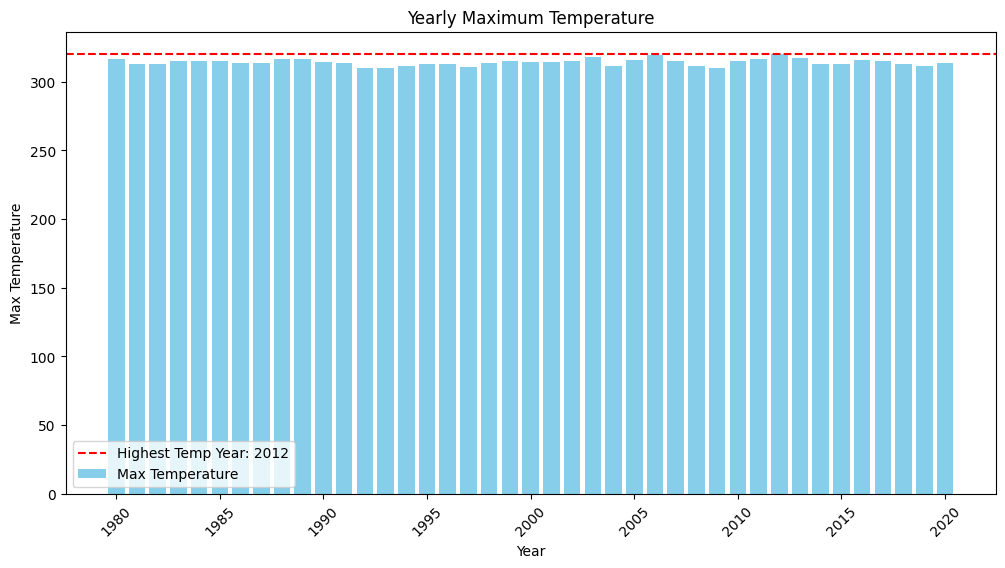

In [ ]:
data['Year'] =  data['Date'].dt.year
yearly_max_temp = data.groupby('Year')['max_temp'].max().reset_index()
year_with_highest_temp = yearly_max_temp[yearly_max_temp['max_temp'] == yearly_max_temp['max_temp'].max()]

# Create a bar plot to visualize the year with the highest temperature
plt.figure(figsize=(12, 6))
plt.bar(yearly_max_temp['Year'], yearly_max_temp['max_temp'], color='skyblue', label='Max Temperature')
plt.title('Yearly Maximum Temperature')
plt.xlabel('Year')
plt.ylabel('Max Temperature')
plt.xticks(rotation=45)
plt.axhline(year_with_highest_temp['max_temp'].values[0], color='red', linestyle='--', label=f'Highest Temp Year: {year_with_highest_temp["Year"].values[0]}')
plt.legend()
plt.show()


In [ ]:
data.columns

Index(['Date', 'min_humidity', 'max_humidity', 'min_temp', 'max_temp',
       'vapor_pressure_deficit', 'near_surface_specific_humidity',
       'precipitation', 'solar_radiation', 'wind_speed', 'state', 'ID',
       'Year'],
      dtype='object')

In [ ]:
data.head()

,Date,min_humidity,max_humidity,min_temp,max_temp,vapor_pressure_deficit,near_surface_specific_humidity,precipitation,solar_radiation,wind_speed,state,ID,Year
0,1980-01-01,41.3,83.9,266.3,279.8,0.34,0.00223,0.0,87.5,3.0,Nebraska,6,1980
1,1980-01-01,31.1,81.0,263.8,278.9,0.35,0.0017,0.0,69.3,2.1,South Dakota,8,1980
2,1980-01-01,47.6,87.0,267.7,274.8,0.18,0.00233,0.0,88.0,2.6,Wisconsin,9,1980
3,1980-01-01,54.2,97.1,271.3,279.6,0.23,0.00325,0.0,93.5,2.8,Kentucky,12,1980
4,1980-01-01,46.6,87.0,269.5,281.3,0.33,0.00282,0.0,102.5,2.5,Missouri,5,1980


In [ ]:
data['solar_radiation_numeric'] = pd.to_numeric(data['solar_radiation'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN


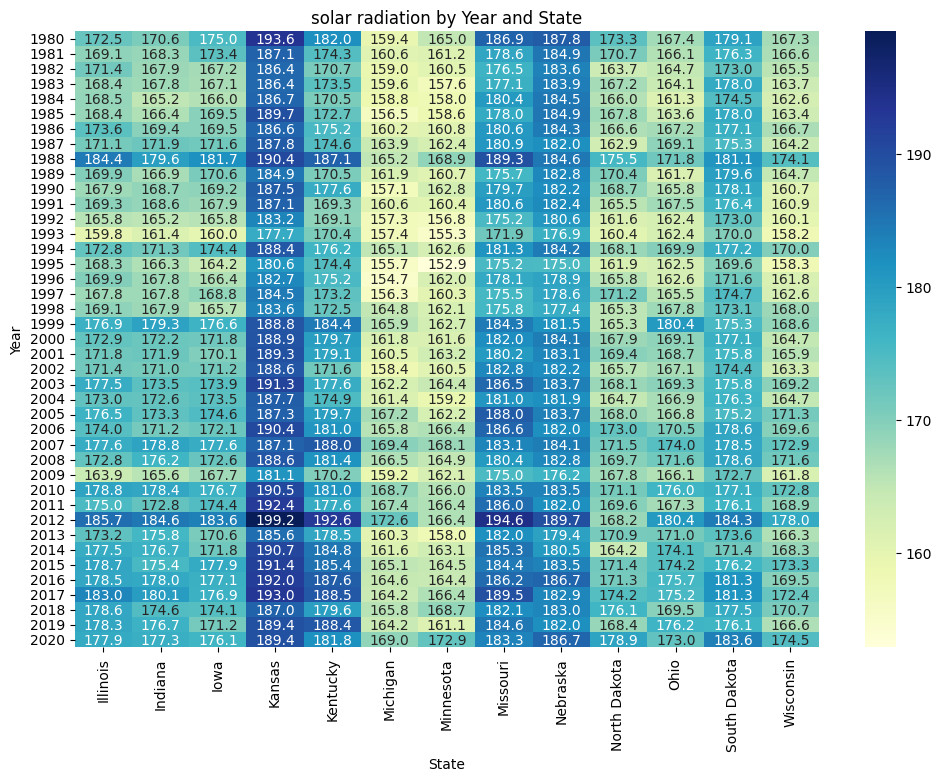

In [ ]:
heatmap_data = data.pivot_table(index='Year', columns='state', values='solar_radiation_numeric')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=True, annot=True, fmt=".1f")
plt.title('solar radiation by Year and State')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()

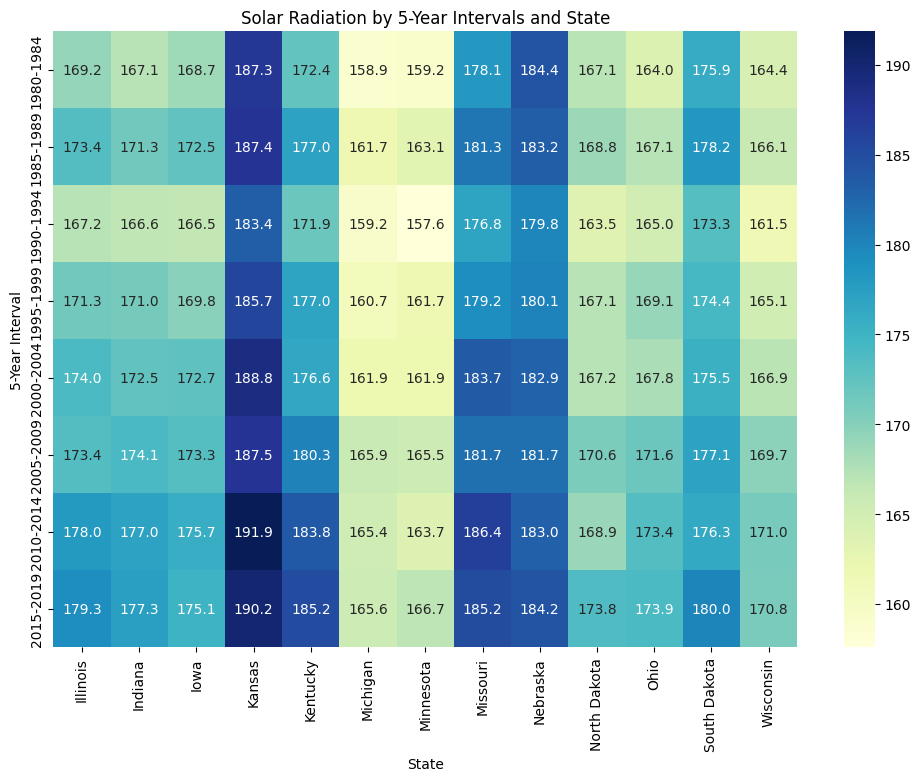

In [ ]:
data['Year Group'] = pd.cut(data['Year'], bins=range(1980, 2026, 5), labels=[f'{start}-{start+4}' for start in range(1980, 2021, 5)])

# Pivot the data to create a heatmap for 5-year intervals
heatmap_data = data.pivot_table(index='Year Group', columns='state', values='solar_radiation_numeric')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=True, annot=True, fmt=".1f")
plt.title('Solar Radiation by 5-Year Intervals and State')
plt.xlabel('State')
plt.ylabel('5-Year Interval')
plt.show()

# Visualisation with yield

In [18]:
!pip install pandas==1.5.3

     ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
      --------------------------------------- 0.1/10.4 MB 2.8 MB/s eta 0:00:04
     --- ------------------------------------ 0.8/10.4 MB 10.8 MB/s eta 0:00:01
     ----- ---------------------------------- 1.4/10.4 MB 10.2 MB/s eta 0:00:01
     --------- ------------------------------ 2.3/10.4 MB 13.5 MB/s eta 0:00:01
     ---------- ----------------------------- 2.6/10.4 MB 13.8 MB/s eta 0:00:01
     ---------- ----------------------------- 2.6/10.4 MB 13.8 MB/s eta 0:00:01
     ---------- ----------------------------- 2.6/10.4 MB 13.8 MB/s eta 0:00:01
     ---------- ----------------------------- 2.6/10.4 MB 13.8 MB/s eta 0:00:01
     ---------- ----------------------------- 2.6/10.4 MB 13.8 MB/s eta 0:00:01
     ---------- ----------------------------- 2.7/10.4 MB 5.9 MB/s eta 0:00:02
     ------------ --------------------------- 3.2/10.4 MB 6.6 MB/s eta 0:00:02
     ------------ --------------------------- 3.3/1

  You can safely remove it manually.
  You can safely remove it manually.


In [30]:
with open(r"D:\BigDataProject-BtechDS4thYear\BigDataProject-Capstone\dataCollection\final_df_1980_2020_statewise_with_corn_yield.pkl", 'rb') as file:
    df = pickle.load(file)

In [31]:
df.to_csv("state_year_expanded_column_data.csv")

In [27]:
summary = df.describe().T
summary


,count,mean,std,min,25%,50%,75%,max
Year,533.0,2000.000000,11.843275,1980.000000,1990.000000,2000.000000,2010.000000,2020.000000
max_humidity 00,468.0,89.769412,8.504079,55.600000,84.466667,91.650000,96.731250,100.000000
max_humidity 01,533.0,88.750281,8.937566,59.614286,83.242857,90.928571,95.900000,100.000000
max_humidity 02,533.0,88.970571,7.644435,67.914286,83.585714,89.842857,95.257143,100.000000
max_humidity 03,533.0,88.992388,7.977155,52.557143,84.157143,90.300000,95.342857,100.000000
...,...,...,...,...,...,...,...,...
wind_speed 50,533.0,4.373171,0.967265,2.100000,3.671429,4.271429,4.914286,8.328571
wind_speed 51,533.0,4.515679,0.984736,2.114286,3.842857,4.442857,5.128571,7.785714
wind_speed 52,533.0,4.515177,1.089788,1.800000,3.783333,4.460000,5.185714,8.166667
wind_speed 53,91.0,3.735714,1.185568,1.500000,2.875000,3.700000,4.450000,7.500000
